## TP n° 1 : Génération de contenu musical au format MIDI avec ```miditoolkit```
### Auteur : Jad El Karchi

### - Partie 1 : Création d'un fichier MIDI

In [45]:
import numpy as np
from miditoolkit.constants import DEFAULT_BPM
import miditoolkit as mt
from miditoolkit.midi import parser as mid_parser
from miditoolkit.midi import containers as ct
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
np.random.seed(123)


Default ticks per beat in miditoolkit: 480

Note(velocity=100, pitch=60, start=0, end=1920)

marker: [Marker(text="HI", time=0)]


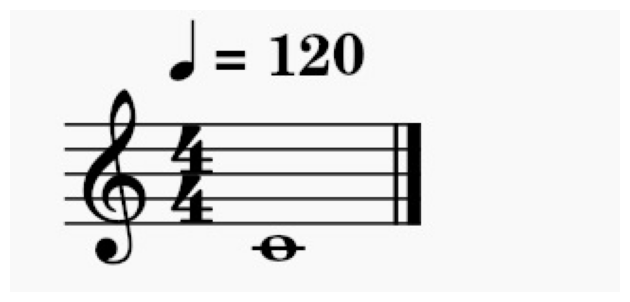

In [49]:
class MIDIGenerator:
    def __init__(self):
        self.mido_obj = mt.MidiFile()
        self.beat_resol = self.mido_obj.ticks_per_beat
        print(f"Default ticks per beat in miditoolkit: {self.beat_resol}\n")

    def create_instrument(self):
        track = mt.Instrument(program=0, is_drum=False, name='example track')
        self.mido_obj.instruments = [track]

    def create_one_note(self):
        start = 0
        end = int(self.beat_resol * 4)
        pitch = 60
        velocity = 100
        note = mt.Note(start=start, end=end, pitch=pitch, velocity=velocity)
        self.mido_obj.instruments[0].notes.append(note)

    def create_markers(self):
        marker_hi = mt.Marker(time=0, text='HI')
        self.mido_obj.markers.append(marker_hi)

    def write_to_file(self, file_path):
        self.mido_obj.dump(file_path)

    def reload_and_check(self, file_path):
        mido_obj_re = mt.MidiFile(file_path)
        for note in mido_obj_re.instruments[0].notes:
            print(note)

        print('\nmarker:', mido_obj_re.markers)

    def show_image(self, image_path):
        try:
            img = mpimg.imread(image_path)
            imgplot = plt.imshow(img)
            plt.axis('off')  # Hide axes
            plt.tight_layout()
            plt.show()
        except FileNotFoundError:
            print(f"Error: File not found at path '{image_path}'.")

    def create_midi(self, midi_name, plot_name, note_generator):
        self.create_instrument()
        note_generator()
        self.create_markers()
        self.write_to_file(midi_name)
        self.reload_and_check(midi_name)
        self.show_image(plot_name)

    
midi_generator = MIDIGenerator()
midi_generator.create_midi("midi/result_1_note.midi", "figures/1_note.jpg", midi_generator.create_one_note)

Default ticks per beat in miditoolkit: 480

Note(velocity=72, pitch=71, start=0, end=240)
Note(velocity=44, pitch=71, start=240, end=360)
Note(velocity=102, pitch=64, start=360, end=600)
Note(velocity=51, pitch=66, start=600, end=720)
Note(velocity=57, pitch=63, start=720, end=780)
Note(velocity=13, pitch=70, start=780, end=900)
Note(velocity=82, pitch=60, start=900, end=1140)
Note(velocity=52, pitch=66, start=1140, end=1260)
Note(velocity=118, pitch=64, start=1260, end=1320)
Note(velocity=49, pitch=67, start=1320, end=1440)

marker: [Marker(text="HI", time=0)]


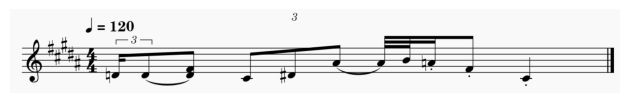

In [50]:
class MIDIGenerator(MIDIGenerator):
    def create_random_notes(self):
        pitches = np.random.randint(60, 72, size=10)  # Random pitches between C4 (60) and C5 (71)

        durations = [self.beat_resol * 0.125, self.beat_resol * 0.25, self.beat_resol * 0.5]  # Eighth, quarter, half notes

        prev_end = 0

        for pitch in pitches:
            start = prev_end
            duration = np.random.choice(durations)
            end = start + int(duration)
            velocity = np.random.randint(1, 127)

            note = mt.Note(start=start, end=end, pitch=pitch, velocity=velocity)
            self.mido_obj.instruments[0].notes.append(note)

            prev_end = end
        
        
midi_generator = MIDIGenerator()
midi_generator.create_midi("midi/result_10_notes.midi", "figures/10_notes.jpg", midi_generator.create_random_notes)

### - Partie 2 : Analyse d'un fichier MIDI

Default ticks per beat in miditoolkit: 480

Note(velocity=64, pitch=76, start=60, end=120)
Note(velocity=64, pitch=73, start=120, end=180)
Note(velocity=64, pitch=71, start=180, end=240)
Note(velocity=64, pitch=76, start=240, end=300)
Note(velocity=64, pitch=74, start=300, end=360)
Note(velocity=64, pitch=73, start=360, end=420)
Note(velocity=64, pitch=71, start=420, end=480)
Note(velocity=64, pitch=76, start=540, end=600)
Note(velocity=64, pitch=78, start=600, end=660)
Note(velocity=64, pitch=76, start=660, end=720)
Note(velocity=64, pitch=73, start=720, end=780)
Note(velocity=64, pitch=71, start=780, end=840)
Note(velocity=64, pitch=66, start=840, end=900)
Note(velocity=64, pitch=69, start=900, end=960)
Note(velocity=64, pitch=76, start=1020, end=1080)
Note(velocity=64, pitch=73, start=1080, end=1140)
Note(velocity=64, pitch=76, start=1140, end=1200)
Note(velocity=64, pitch=71, start=1200, end=1260)
Note(velocity=64, pitch=73, start=1260, end=1320)
Note(velocity=64, pitch=71, start=1

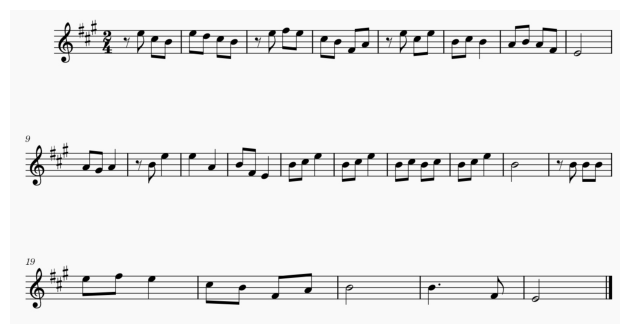

In [52]:
midi_file = "midi/shanxi-802.mid"
midi_generator = MIDIGenerator()
midi_generator.reload_and_check(midi_file)
midi_generator.show_image("figures/shanxi-802.jpg")

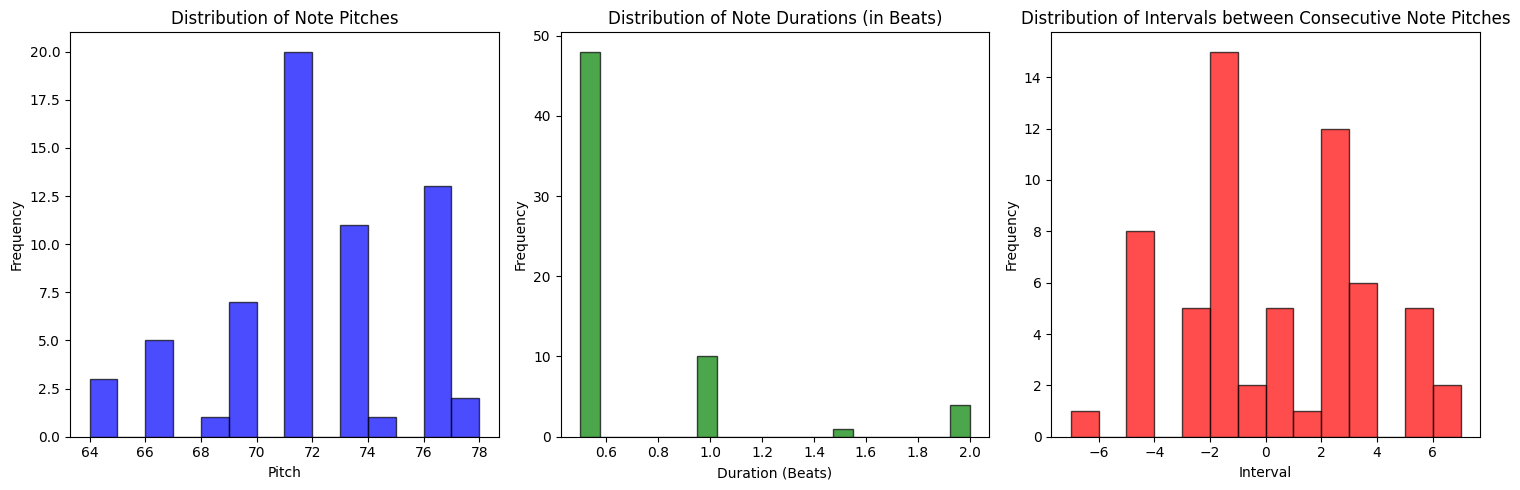

In [54]:
def plot_midi_statistics(file_path):
    # Read MIDI file
    midi_file = mt.MidiFile(file_path)
    ticks_per_beat = midi_file.ticks_per_beat

    # Extract data
    pitches = [note.pitch for note in midi_file.instruments[0].notes]
    durations = [(note.end - note.start) / ticks_per_beat for note in midi_file.instruments[0].notes]
    intervals = [y - x for x, y in zip(pitches[:-1], pitches[1:])]

    # Plot histograms
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.hist(pitches, bins=range(min(pitches), max(pitches) + 1), alpha=0.7, color='b', edgecolor='black')
    plt.title('Distribution of Note Pitches')
    plt.xlabel('Pitch')
    plt.ylabel('Frequency')

    plt.subplot(132)
    plt.hist(durations, bins=20, alpha=0.7, color='g', edgecolor='black')
    plt.title('Distribution of Note Durations (in Beats)')
    plt.xlabel('Duration (Beats)')
    plt.ylabel('Frequency')

    plt.subplot(133)
    plt.hist(intervals, bins=range(min(intervals), max(intervals) + 1), alpha=0.7, color='r', edgecolor='black')
    plt.title('Distribution of Intervals between Consecutive Note Pitches')
    plt.xlabel('Interval')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    
plot_midi_statistics(f"{midi_file}")


In [59]:
def get_distribution(values):
    distribution = {}
    for val in values:
        distribution[val] = distribution.get(val, 0) + 1
    return distribution

def sample_from_distribution(distribution):
    total = sum(distribution.values())
    probabilities = [count / total for count in distribution.values()]
    return np.random.choice(list(distribution.keys()), p=probabilities)

def note_generator_by_interval_distribution(mido_obj, beat_resol, pitch_values, duration_values, num_notes=30):
    pitch_distribution = get_distribution(pitch_values)
    duration_distribution = get_distribution(duration_values)

    # Generate the first pitch from the distribution of initial pitches
    initial_pitch = ord(sample_from_distribution(pitch_distribution))
    prev_pitch = initial_pitch

    prev_end = 0
    for _ in range(num_notes):
        # If it's the first iteration, use the initial pitch
        if _ == 0:
            pitch = initial_pitch
        else:
            # Generate pitch by sampling from the distribution of intervals
            interval = ord(sample_from_distribution(pitch_distribution))
            pitch = (prev_pitch + interval)%128

        duration = ord(sample_from_distribution(duration_distribution))
        start = prev_end
        end = prev_end + beat_resol * duration
        velocity = np.random.randint(1, 127)
        note = ct.Note(start=start, end=end, pitch=pitch, velocity=velocity)
        mido_obj.instruments[0].notes.append(note)

        prev_end = end
        prev_pitch = pitch

# Example usage:
midi_generator = MIDIGenerator()
mido_obj, beat_resol = midi_generator.mido_obj, midi_generator.beat_resol
midi_generator.create_instrument()

# Define pitch and duration values as a string
values = 'abracadabra'
file_name = 'midi/midi_by_interval_distribution_abracadabra.mid'

# Generate melody using interval distribution for pitches
note_generator_by_interval_distribution(mido_obj, beat_resol, values, values)

# Additional steps to save or visualize the generated MIDI
midi_generator.create_markers()
midi_generator.write_to_file(file_name)
midi_generator.reload_and_check(file_name)

Default ticks per beat in miditoolkit: 480

Note(velocity=79, pitch=100, start=0, end=46560)
Note(velocity=6, pitch=86, start=46560, end=93120)
Note(velocity=26, pitch=55, start=93120, end=139680)
Note(velocity=59, pitch=41, start=139680, end=186240)
Note(velocity=31, pitch=27, start=186240, end=233280)
Note(velocity=91, pitch=126, start=233280, end=279840)
Note(velocity=99, pitch=95, start=279840, end=326880)
Note(velocity=114, pitch=67, start=326880, end=374880)
Note(velocity=38, pitch=37, start=374880, end=421440)
Note(velocity=62, pitch=6, start=421440, end=468000)
Note(velocity=95, pitch=103, start=468000, end=514560)
Note(velocity=91, pitch=89, start=514560, end=562080)
Note(velocity=71, pitch=58, start=562080, end=608640)
Note(velocity=1, pitch=28, start=608640, end=655680)
Note(velocity=95, pitch=125, start=655680, end=710400)
Note(velocity=3, pitch=94, start=710400, end=756960)
Note(velocity=3, pitch=64, start=756960, end=804000)
Note(velocity=33, pitch=50, start=804000, end=8

### - Partie 3 : Matrices de transition

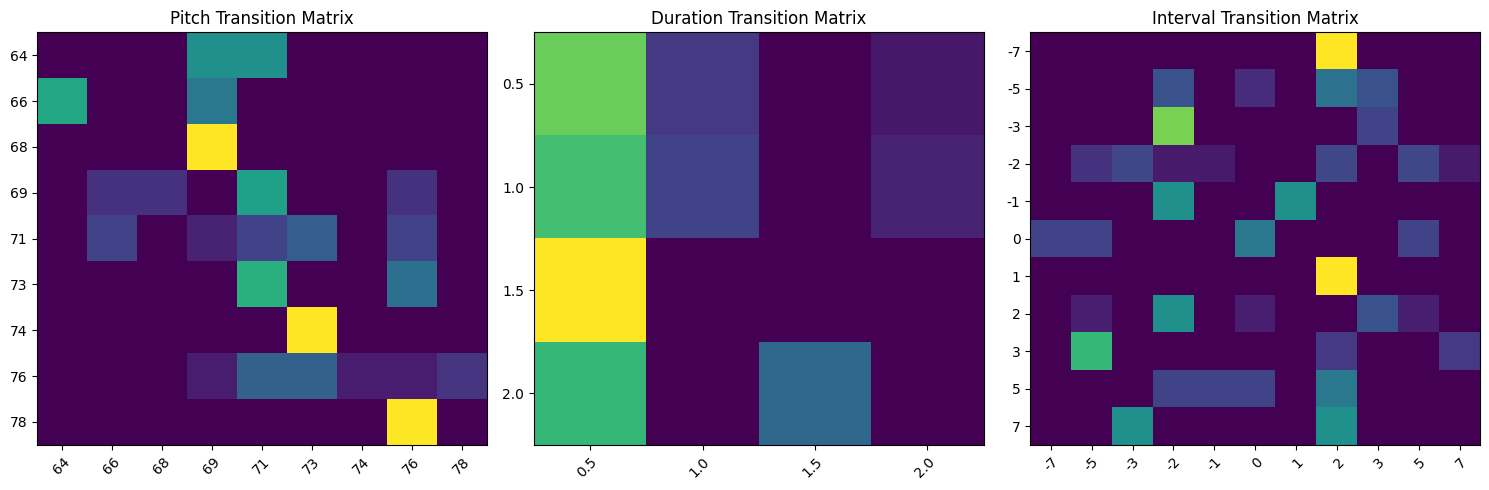

In [60]:
def calculate_transition_matrix(sequence):
    unique_values = sorted(set(sequence))
    num_values = len(unique_values)

    transition_matrix = np.zeros((num_values, num_values))

    for i in range(len(sequence) - 1):
        current_value = sequence[i]
        next_value = sequence[i + 1]

        current_index = unique_values.index(current_value)
        next_index = unique_values.index(next_value)

        transition_matrix[current_index, next_index] += 1

    # Normalize the matrix to get transition probabilities
    row_sums = transition_matrix.sum(axis=1)
    
     # Avoid division by zero: handle zero row sums by setting them to a small positive value
    row_sums[row_sums == 0] = 1e-10

    # Normalization for non-zero row sums
    transition_matrix = transition_matrix / row_sums[:, np.newaxis]

    return transition_matrix, unique_values


def plot_transition_matrix(ax, matrix, unique_values, title):
    im = ax.imshow(matrix, cmap='viridis', interpolation='nearest', aspect='auto')

    ax.set_xticks(np.arange(len(unique_values)))
    ax.set_yticks(np.arange(len(unique_values)))
    ax.set_xticklabels(unique_values)
    ax.set_yticklabels(unique_values)
    ax.set_title(title)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    return im

def load_midi_file(file_path):
    midi_obj = mt.MidiFile(file_path)
    try :
        midi_obj.instruments[0].notes
    except:
        print(f"Error: No notes found in the MIDI file at path '{file_path}'.")
        return None
    pitches = [note.pitch for note in midi_obj.instruments[0].notes]
    durations = [(note.end - note.start) / midi_obj.ticks_per_beat for note in midi_obj.instruments[0].notes]
    intervals = [y - x for x, y in zip(pitches[:-1], pitches[1:])]
    return pitches, durations, intervals

# Example usage:
mido_obj = mt.MidiFile('midi/shanxi-802.mid')

# Extract pitch, duration, and interval sequences from the MIDI file
pitches, durations, intervals = load_midi_file('midi/shanxi-802.mid')

# Calculate transition matrices for pitches, durations, and intervals
pitch_transition_matrix, pitch_unique_values = calculate_transition_matrix(pitches)
duration_transition_matrix, duration_unique_values = calculate_transition_matrix(durations)
interval_transition_matrix, interval_unique_values = calculate_transition_matrix(intervals)

# Plot all three transition matrices in one figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

plot_transition_matrix(axs[0], pitch_transition_matrix, pitch_unique_values, 'Pitch Transition Matrix')
plot_transition_matrix(axs[1], duration_transition_matrix, duration_unique_values, 'Duration Transition Matrix')
plot_transition_matrix(axs[2], interval_transition_matrix, interval_unique_values, 'Interval Transition Matrix')

plt.tight_layout()
plt.show()


In [62]:
# Generate melodies
def generate_max_probability_melody(transition_matrix, unique_values, num_notes=100):
    melody = []

    # Choose the first value randomly
    current_value = np.random.choice(unique_values)
    melody.append(current_value)

    for _ in range(num_notes - 1):
        current_index = unique_values.index(current_value)
        # maximize probability
        next_index = np.argmax(transition_matrix[current_index])
        next_value = unique_values[next_index]

        melody.append(next_value)
        current_value = next_value

    return melody

def generate_random_melody(transition_matrix, unique_values, num_notes=30):
    melody = []

    # Choose the first value randomly
    current_value = np.random.choice(unique_values)
    melody.append(current_value)

    for _ in range(num_notes - 1):
        current_index = unique_values.index(current_value)
        # pick randomly
        next_index = np.random.choice(len(unique_values), p=transition_matrix[current_index])
        next_value = unique_values[next_index]

        melody.append(next_value)
        current_value = next_value

    return melody

max_prob_pitch_melody = generate_max_probability_melody(pitch_transition_matrix, pitch_unique_values)
max_prob_duration_melody = generate_max_probability_melody(duration_transition_matrix, duration_unique_values)
max_prob_interval_melody = generate_max_probability_melody(interval_transition_matrix, interval_unique_values)

random_pitch_melody = generate_random_melody(pitch_transition_matrix, pitch_unique_values)
random_duration_melody = generate_random_melody(duration_transition_matrix, duration_unique_values)
random_interval_melody = generate_random_melody(interval_transition_matrix, interval_unique_values)

# Print the generated melodies as needed
print("\nPitch Melody with Max Probability:", max_prob_pitch_melody)
print("Duration Melody with Max Probability:", max_prob_duration_melody)
print("Interval Melody with Max Probability:", max_prob_interval_melody)

print("\nRandom Pitch Melody:", random_pitch_melody)
print("Random Duration Melody:", random_duration_melody)
print("Random Interval Melody:", random_interval_melody)


Pitch Melody with Max Probability: [71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73, 71, 73]
Duration Melody with Max Probability: [1.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Interval Melody with Max

### - Partie 4 : Apprentissage sur un corpus

In [63]:
def generate_random_melody_with_log_probability(transition_matrices, unique_values_list, num_notes=30):
    melody = []
    log_probability = 0.0
    random_index = np.random.choice(len(transition_matrices), 1)[0]

    unique_values = unique_values_list[random_index]
    transition_matrix = transition_matrices[random_index]
    
    # Choose the first value randomly    
    current_value = np.random.choice(unique_values)
    melody.append(current_value)

    for _ in range(num_notes - 1):
        random_index = np.random.choice(len(transition_matrices), 1)[0]
        
        unique_values = unique_values_list[random_index]
        transition_matrix = transition_matrices[random_index]
    
        if current_value not in unique_values:
            # If not, choose a new current_value randomly from unique_values
            current_index = unique_values.index(np.random.choice(unique_values))
        else :
            current_index = unique_values.index(current_value)
            

        row_sum = np.sum(transition_matrix[current_index])
        if row_sum > 0:
            next_index = np.random.choice(len(unique_values), p=transition_matrix[current_index] / row_sum)
        else:
            # If the row sum is zero, set probabilities to a uniform distribution
            next_index = np.random.choice(len(unique_values))

        next_value = unique_values[next_index]
        melody.append(next_value)

        
        log_probability += -np.log(transition_matrix[current_index, next_index] + 1e-10)

        current_value = next_value

    return melody, log_probability

def load_corpus(directory_path, transition_matrix_generator):
    # Load MIDI files from the directory
    midi_files = [f for f in os.listdir(directory_path) if f.lower().endswith(('.mid', '.midi'))]

    if not midi_files:
        raise ValueError("No MIDI files found in the specified directory.")

    pitch_transition_matrices = []
    pitch_unique_values_list = []
    duration_transition_matrices = []
    duration_unique_values_list = []
    interval_transition_matrices = []
    interval_unique_values_list = []
    
    # Load training data
    for midi_file in midi_files:
        file_path = os.path.join(directory_path, midi_file)
        output = load_midi_file(file_path)
        
        if output is not None :
            pitch_transition_matrix, pitch_unique_values = transition_matrix_generator(output[0]) # pitches
            duration_transition_matrix, duration_unique_values = transition_matrix_generator(output[1]) # durations
            interval_transition_matrix, interval_unique_values = transition_matrix_generator(output[2]) # intervals
            
            # Store the calculated transition matrices and unique values in lists
            pitch_transition_matrices.append(pitch_transition_matrix)
            pitch_unique_values_list.append(pitch_unique_values)
            duration_transition_matrices.append(duration_transition_matrix)
            duration_unique_values_list.append(duration_unique_values)
            interval_transition_matrices.append(interval_transition_matrix)
            interval_unique_values_list.append(interval_unique_values)
            
    return pitch_transition_matrices,\
            pitch_unique_values_list,\
            duration_transition_matrices,\
            duration_unique_values_list,\
            interval_transition_matrices,\
            interval_unique_values_list


def train_melody_model(directory_path, num_iterations=1000, num_melodies_per_iteration=1, transition_matrix_generator=calculate_transition_matrix, melody_generator=generate_random_melody_with_log_probability):
    # Load MIDI files from the directory
    midi_files = [f for f in os.listdir(directory_path) if f.lower().endswith(('.mid', '.midi'))]

    if not midi_files:
        raise ValueError("No MIDI files found in the specified directory.")

    pitch_transition_matrices,\
    pitch_unique_values_list,\
    duration_transition_matrices,\
    duration_unique_values_list,\
    interval_transition_matrices,\
    interval_unique_values_list = load_corpus(directory_path, transition_matrix_generator)

    best_melody = None
    best_log_probability = float('inf')
    for iteration in range(num_iterations):
        print(f"{((iteration+1)/num_iterations)*100:.2f}%", end="\r")
        current_melody = None
        current_log_probability = float('inf')
        
        # Generate multiple melodies and keep the most probable one
        for _ in range(num_melodies_per_iteration):
            random_pitch_melody, log_prob_pitch = melody_generator(
                pitch_transition_matrices, pitch_unique_values_list
            )

            random_duration_melody, log_prob_duration = melody_generator(
                duration_transition_matrices, duration_unique_values_list
            )

            random_interval_melody, log_prob_interval = melody_generator(
                interval_transition_matrices, interval_unique_values_list
            )

            # Combine the probabilities of pitch, duration, and interval
            total_log_probability = log_prob_pitch + log_prob_duration + log_prob_interval

            # Update the current melody if the new one has a higher probability
            if total_log_probability < current_log_probability:
                current_log_probability = total_log_probability
                current_melody = (random_pitch_melody, random_duration_melody, random_interval_melody)

        # Update the best melody if the new one has a higher probability
        if current_log_probability < best_log_probability:
            best_log_probability = current_log_probability
            best_melody = current_melody

    # Print or use the best melody as needed
    print("Best Melody (Pitch, Duration, Interval):")
    print(best_melody)
    print("Negative Log Probability of the Best Melody:", best_log_probability)
    return best_melody, best_log_probability

def save_melody_to_midi(pitches, durations, output_file_path='output.mid'):
    midi_file = mt.MidiFile()
    piano_program = 0

    # Add a piano instrument to the MidiFile
    midi_file.instruments.append(mt.Instrument(program=piano_program))

    ticks_per_beat = 480  # You can adjust this based on your preferences

    # Add notes to the piano instrument
    current_tick = 0
    for pitch, duration in zip(pitches, durations):
        # Convert duration to ticks
        duration_ticks = int(duration * ticks_per_beat)

        # Create a NoteOn event
        note_on = mt.Note(start=current_tick, end=current_tick + duration_ticks, pitch=pitch, velocity=64)
        midi_file.instruments[0].notes.append(note_on)

        # Update current tick for the next note
        current_tick += duration_ticks

    # Set ticks per beat for the MidiFile
    midi_file.ticks_per_beat = ticks_per_beat

    # Save the MidiFile to a file
    midi_file.dump(output_file_path)

In [64]:
best_china_melody, best_china_log_probability = train_melody_model('midi/china/')
save_melody_to_midi(best_china_melody[0], best_china_melody[1], output_file_path='midi/output_corpus_china.mid')

Error: No notes found in the MIDI file at path 'midi/china/han0953.mid'.
Best Melody (Pitch, Duration, Interval):
([86, 76, 74, 74, 77, 71, 69, 67, 73, 65, 64, 69, 84, 65, 67, 76, 62, 84, 71, 74, 64, 85, 62, 69, 64, 62, 62, 67, 71, 76], [0.125, 0.5, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0], [-7, -2, 0, 0, 8, -3, 3, -2, 2, -5, -3, 3, 9, 2, 5, -10, -2, -3, -2, 2, -5, -2, 2, 2, -5, -3, -2, -3, -2, 2])
Negative Log Probability of the Best Melody: 58.309499022599745


### - Partie 5 : Comparaison avec un autre corpus

In [65]:
best_finnish_melody, best_finnish_log_probability = train_melody_model('midi/finnish/')
save_melody_to_midi(best_finnish_melody[0], best_finnish_melody[1], output_file_path='midi/output_corpus_finnish.mid')

Best Melody (Pitch, Duration, Interval):
([67, 67, 71, 74, 72, 72, 70, 66, 76, 67, 64, 67, 69, 62, 64, 64, 67, 71, 72, 71, 74, 62, 62, 64, 74, 74, 64, 67, 74, 60], [0.25, 0.5, 1.0, 0.5, 0.5, 0.75, 1.0, 0.5, 0.5, 2.0, 0.75, 1.0, 1.0, 0.5, 0.5, 1.5, 0.5, 0.5, 0.25, 0.5, 0.5, 0.5, 1.0, 1.0, 0.25, 1.0, 0.25, 0.5, 0.5, 0.5], [2, 1, -5, 0, -2, -1, -2, 2, 0, -3, 5, -2, -2, 2, -4, 0, -5, 5, -5, 0, -3, 1, -3, 5, -2, 3, -2, -4, 2, 0])
Negative Log Probability of the Best Melody: 48.2409692407033


In [66]:
# Load transition matrices and unique values for both corpuses
pitch_transition_matrices_china,\
pitch_unique_values_list_china,\
duration_transition_matrices_china,\
duration_unique_values_list_china,\
interval_transition_matrices_china,\
interval_unique_values_list_china = load_corpus('midi/china/', calculate_transition_matrix)

pitch_transition_matrices_finland,\
pitch_unique_values_list_finland,\
duration_transition_matrices_finland,\
duration_unique_values_list_finland,\
interval_transition_matrices_finland,\
interval_unique_values_list_finland  = load_corpus('midi/finnish/', calculate_transition_matrix)

# Generate two melodies from the corpuses
best_china_melody, _ = train_melody_model('midi/china/')
best_finnish_melody, _ = train_melody_model('midi/finnish/')

Error: No notes found in the MIDI file at path 'midi/china/han0953.mid'.
Error: No notes found in the MIDI file at path 'midi/china/han0953.mid'.
Best Melody (Pitch, Duration, Interval):
([66, 77, 81, 65, 71, 72, 71, 69, 71, 84, 64, 70, 60, 72, 77, 74, 76, 76, 82, 65, 64, 65, 71, 78, 76, 74, 76, 70, 62, 73], [1.0, 0.25, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 2.5, 0.5, 0.5, 2.0, 0.25, 0.25, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.25, 1.0, 1.0, 0.25, 0.5, 0.5, 0.25], [12, 0, 0, -2, -1, 0, -3, -2, -3, -2, -2, -3, 3, 0, -2, -2, -3, 3, -7, 2, 3, 5, -7, -3, -4, 5, 0, 0, 5, -5])
Negative Log Probability of the Best Melody: 58.35622762172856
Best Melody (Pitch, Duration, Interval):
([62, 72, 77, 76, 67, 64, 62, 64, 67, 76, 66, 64, 69, 67, 64, 60, 69, 67, 71, 64, 67, 66, 69, 67, 70, 78, 73, 69, 64, 65], [0.25, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 2.0, 0.25, 0.5, 0.25, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 0.75, 0.5, 0.5, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [-5, 4, -1, 0, 5, 2, -2, 0, 0, -3, 1, 4

In [67]:
def calculate_log_probability(melody, transition_matrix, unique_values):
    log_probability = 0.0
    current_value = melody[0]

    for next_value in melody[1:]:
        try:
            current_index = unique_values.index(current_value)
            next_index = unique_values.index(next_value)
        except ValueError:
            log_probability += 0  # Assigning positive infinity for simplicity, you can choose a different strategy
            current_value = next_value
            continue

        log_probability += -np.log(transition_matrix[current_index, next_index])
        current_value = next_value

    return log_probability

def copmare_corpus():
    # Calculate log probabilities for China melody in Finland corpus
    finland_pitch_log_prob_china = calculate_log_probability(best_china_melody[0], pitch_transition_matrices_finland, pitch_unique_values_list_finland)
    finland_duration_log_prob_china = calculate_log_probability(best_china_melody[1], duration_transition_matrices_finland, duration_unique_values_list_finland)
    finland_interval_log_prob_china = calculate_log_probability(best_china_melody[2], interval_transition_matrices_finland, interval_unique_values_list_finland)
    total_finland_log_prob_china = finland_pitch_log_prob_china + finland_duration_log_prob_china + finland_interval_log_prob_china

    # Calculate log probabilities for Finland melody in China corpus
    china_pitch_log_prob_finland = calculate_log_probability(best_finnish_melody[0], pitch_transition_matrices_china, pitch_unique_values_list_china)
    china_duration_log_prob_finland = calculate_log_probability(best_finnish_melody[1], duration_transition_matrices_china, duration_unique_values_list_china)
    china_interval_log_prob_finland = calculate_log_probability(best_finnish_melody[2], interval_transition_matrices_china, interval_unique_values_list_china)
    total_china_log_prob_finland = china_pitch_log_prob_finland + china_duration_log_prob_finland + china_interval_log_prob_finland

    # Determine which corpus is more probable for each melody
    is_china_more_probable_in_finland = [total_china_log_prob_finland > total_finland_log_prob_china]
    is_finland_more_probable_in_china = [total_finland_log_prob_china > total_china_log_prob_finland]
    
    # Calculate the overall proportion of melodies more probable in the other corpus
    proportion_china_more_probable_in_finland = sum(is_china_more_probable_in_finland) / len(is_china_more_probable_in_finland)
    proportion_finland_more_probable_in_china = sum(is_finland_more_probable_in_china) / len(is_finland_more_probable_in_china)

    print(f"Proportion of China melody more probable in Finland: {proportion_china_more_probable_in_finland*100:.2f}%")
    print(f"Proportion of Finland melody more probable in China: {proportion_finland_more_probable_in_china*100:.2f}%")
    
    
copmare_corpus()

Proportion of China melody more probable in Finland: 0.00%
Proportion of Finland melody more probable in China: 0.00%


## Bonus : Matrice de transition du 2eme Ordre

In [68]:
def calculate_transition_matrices_2_order(sequence):
    unique_values = sorted(set(sequence))
    num_values = len(unique_values)

    # Initialize a list to store transition matrices for each pair of current and next values
    transition_matrix = np.zeros((num_values, num_values, num_values))
    
    for i in range(len(sequence) - 2):  # Iterate up to the second-to-last element
        current_value = sequence[i]
        next_value = sequence[i + 1]
        another_value = sequence[i + 2]

        current_index = unique_values.index(current_value)
        next_index = unique_values.index(next_value)
        another_index = unique_values.index(another_value)

        transition_matrix[current_index, next_index, another_index] += 1 


    # Normalize the matrix to get transition probabilities
    row_sums = transition_matrix.sum(axis=2)
    
     # Avoid division by zero: handle zero row sums by setting them to a small positive value
    row_sums[row_sums == 0] = 1e-10

    # Normalization for non-zero row sums
    transition_matrix = transition_matrix / row_sums[:, np.newaxis]
    
    return transition_matrix, unique_values


a, b = calculate_transition_matrices_2_order(['a', 'b', 'r', 'a', 'c', 'a', 'd', 'a' 'b', 'r', 'a'])
print(a.shape)

(6, 6, 6)


In [69]:
def generate_random_melody_with_log_probability_2_order(transition_matrices, unique_values_list, num_notes=30):
    melody = []
    log_probability = 0.0
    random_index = np.random.choice(len(transition_matrices), 1)[0]

    unique_values = unique_values_list[random_index]
    transition_matrix = transition_matrices[random_index]
    
    # Choose the first value randomly    
    random_choice = np.random.choice(len(unique_values), 1)[0]
    current_value = unique_values[random_choice]
    next_value = unique_values[random_choice + 1] if random_choice < len(unique_values) - 2 else unique_values[0]
    
    melody.append(current_value)
    melody.append(next_value)

    for _ in range(num_notes - 1):
        random_index = np.random.choice(len(transition_matrices), 1)[0]
        
        unique_values = unique_values_list[random_index]
        transition_matrix = transition_matrices[random_index]
        
        # Check if the current value is in the unique_values
        if current_value not in unique_values:
            # If not, choose a new current_value randomly from unique_values
            current_index = unique_values.index(np.random.choice(unique_values))
        else :
            current_index = unique_values.index(current_value)
        
        next_index = current_index + 1 if current_index < len(unique_values) - 1 else 0
        row_sum = np.sum(transition_matrix[current_index][next_index])
        if row_sum > 0:
            # Sample the next index based on the counts in the row
            another_index = np.random.choice(len(unique_values), p=transition_matrix[current_index][next_index] / row_sum)
        else:
            # If the row sum is zero, set probabilities to a uniform distribution
            another_index = np.random.choice(len(unique_values))

        another_value = unique_values[another_index]
        melody.append(another_value)

        # Calculate the negative logarithm of the transition probability
        log_probability += -np.log(transition_matrix[current_index, next_index, another_index] + 1e-10)

        current_value = another_value

    return melody, log_probability


In [70]:

best_china_melody, best_china_log_probability = train_melody_model('midi/china/',
                                                                   transition_matrix_generator=calculate_transition_matrices_2_order,
                                                                   melody_generator=generate_random_melody_with_log_probability_2_order)

Error: No notes found in the MIDI file at path 'midi/china/han0953.mid'.
Best Melody (Pitch, Duration, Interval):
([69, 72, 74, 74, 74, 79, 69, 91, 67, 64, 64, 69, 68, 69, 68, 69, 62, 74, 81, 67, 71, 79, 74, 69, 69, 74, 89, 66, 69, 76, 69], [0.25, 0.5, 0.5, 0.25, 0.125, 0.25, 0.125, 0.5, 0.5, 0.25, 0.5, 0.5, 0.25, 1.0, 0.5, 0.5, 0.25, 0.5, 0.5, 0.25, 0.5, 1.0, 0.5, 0.25, 0.25, 0.25, 0.5, 0.75, 0.5, 1.5, 0.25], [-5, -3, -5, 9, -3, 2, 0, -3, 2, -3, 5, 0, 3, -2, -2, 2, 0, 3, -3, 2, 2, 0, -3, 3, 10, 2, -5, -2, 3, -5, -2])
Negative Log Probability of the Best Melody: -202.43459768270785
